In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1


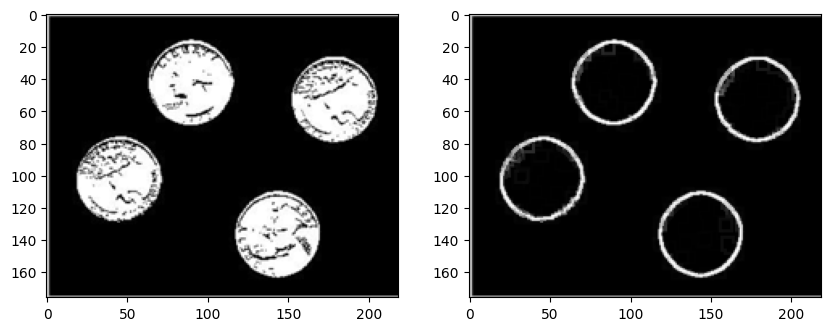

In [3]:
def myMorphology(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    kernel = np.ones((5, 5), np.uint8)

    closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    eroded_image = cv2.erode(closed_image, kernel, iterations=1)

    boundaries = closed_image - eroded_image

    return boundaries


image_path = "coins.png"
boundaries = myMorphology(image_path)

imgGrey = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imgGrey, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(boundaries, cmap="gray")
plt.show()

# Task 2


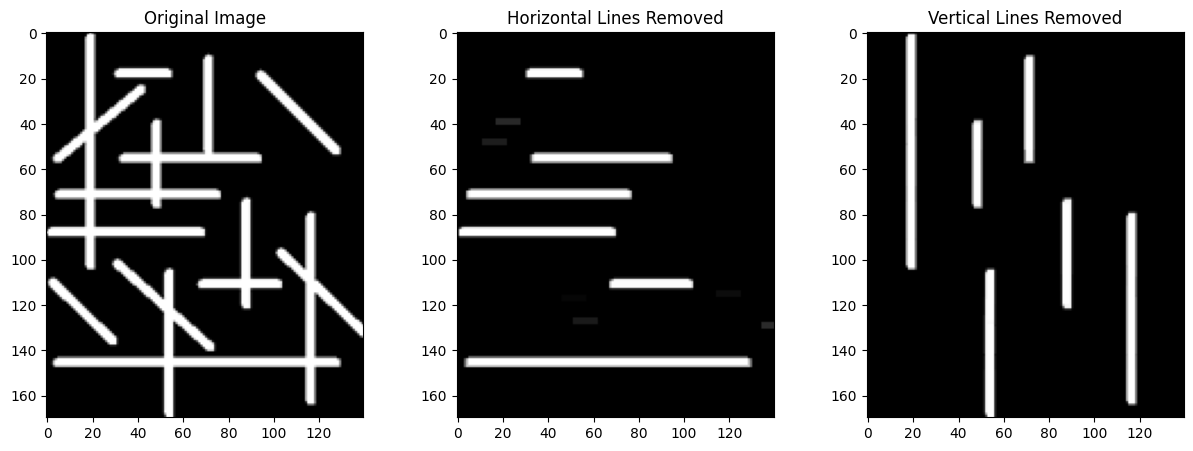

In [ ]:
image = cv2.imread("lines.png", cv2.IMREAD_GRAYSCALE)

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 3))
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 11))

horizontal_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, horizontal_kernel)

vertical_opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, vertical_kernel)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(horizontal_opening, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(vertical_opening, cmap="gray")

plt.show()

# Task 3


In [ ]:
image = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)

_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel_line = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
dilated_line = cv2.dilate(binary_image, kernel_line)

num_lines, _ = cv2.connectedComponents(dilated_line)

kernel_word = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
dilated_word = cv2.dilate(binary_image, kernel_word)

num_words, _ = cv2.connectedComponents(dilated_word)

print(f"Number of lines: {num_lines}")
print(f"Number of words: {num_words}")

cv2.imshow("Binarized Image", binary_image)
cv2.imshow("Dilated Lines", dilated_line)
cv2.imshow("Dilated Words", dilated_word)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of lines: 2
Number of words: 2


# Task 4


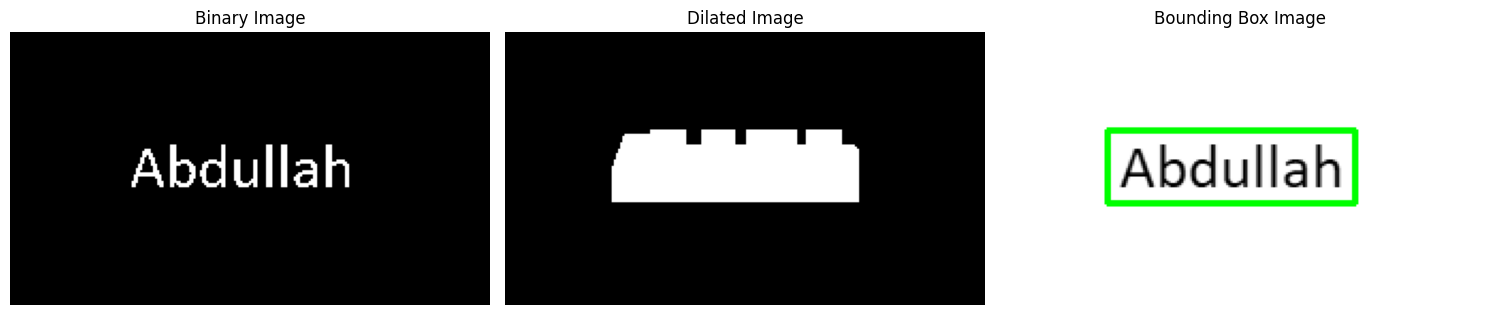

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("name.png", cv2.IMREAD_GRAYSCALE)

_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
dilated_image = cv2.dilate(binary_image, kernel)

contours, _ = cv2.findContours(
    dilated_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

bounding_box_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_box_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(binary_image, cmap="gray")
axes[0].set_title("Binary Image")
axes[0].axis("off")

axes[1].imshow(dilated_image, cmap="gray")
axes[1].set_title("Dilated Image")
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(bounding_box_image, cv2.COLOR_BGR2RGB))
axes[2].set_title("Bounding Box Image")
axes[2].axis("off")

plt.tight_layout()
plt.show()